# Timeseries Bar Plot

Timeseries plots are normally straighforward with matplotlib, but recently I camme up with the need to plot a timeseries as a bar plot instead of a line plot. The idea, was to color each bar according to the timeseries value.

### Initial settings

In [1]:
import random 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

from datetime import timedelta
from typing import Tuple

### The main function

In [2]:
def timeseries_bar_plot(
    data: pd.DataFrame(), 
    time_col: str, 
    value_col: str, 
    date_format: str,
    cmap: str = "plasma",
    figsize: Tuple[int, int] = (20,4),
    dpi: int = 100,
    bar_width: float = 0.006,
    timedelta_min=timedelta(seconds=0),
    timedelta_max=timedelta(seconds=0)
):
    """Plots a timeseries as a bar plot"""
    values = data[value_col]
    timestamps = data[time_col]
    
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)
    
    # Adapt colors
    palette = plt.get_cmap(cmap).colors
    colors = (values/values.max()*(len(palette)-1)).astype(int).apply(lambda x: palette[x])

    # Set plot
    ax.bar(timestamps, values, width=bar_width, color=colors)
    
    # Format dates
    dates_fmt = mdates.DateFormatter(date_format)
    ax.xaxis.set_major_formatter(dates_fmt)
    ax.set_xlim([timestamps.min() - timedelta_min, timestamps.max() + timedelta_max]);
    
    return ax

### Random dataset

Let's start with a randomly generated dataset with some periodicity:

In [3]:
n_periods = 672
random_df = pd.DataFrame(dict(
        time= pd.date_range(start='17-01-2022 00:00:00', end='23-01-2022 23:45:00', periods=n_periods), 
        value=[random.random()*(i%48) for i in range(n_periods)],  
    ))
random_df.head()

,time,value
0,2022-01-17 00:00:00,0.000000
1,2022-01-17 00:15:00,0.511750
2,2022-01-17 00:30:00,0.617427
3,2022-01-17 00:45:00,1.678532
4,2022-01-17 01:00:00,1.785105


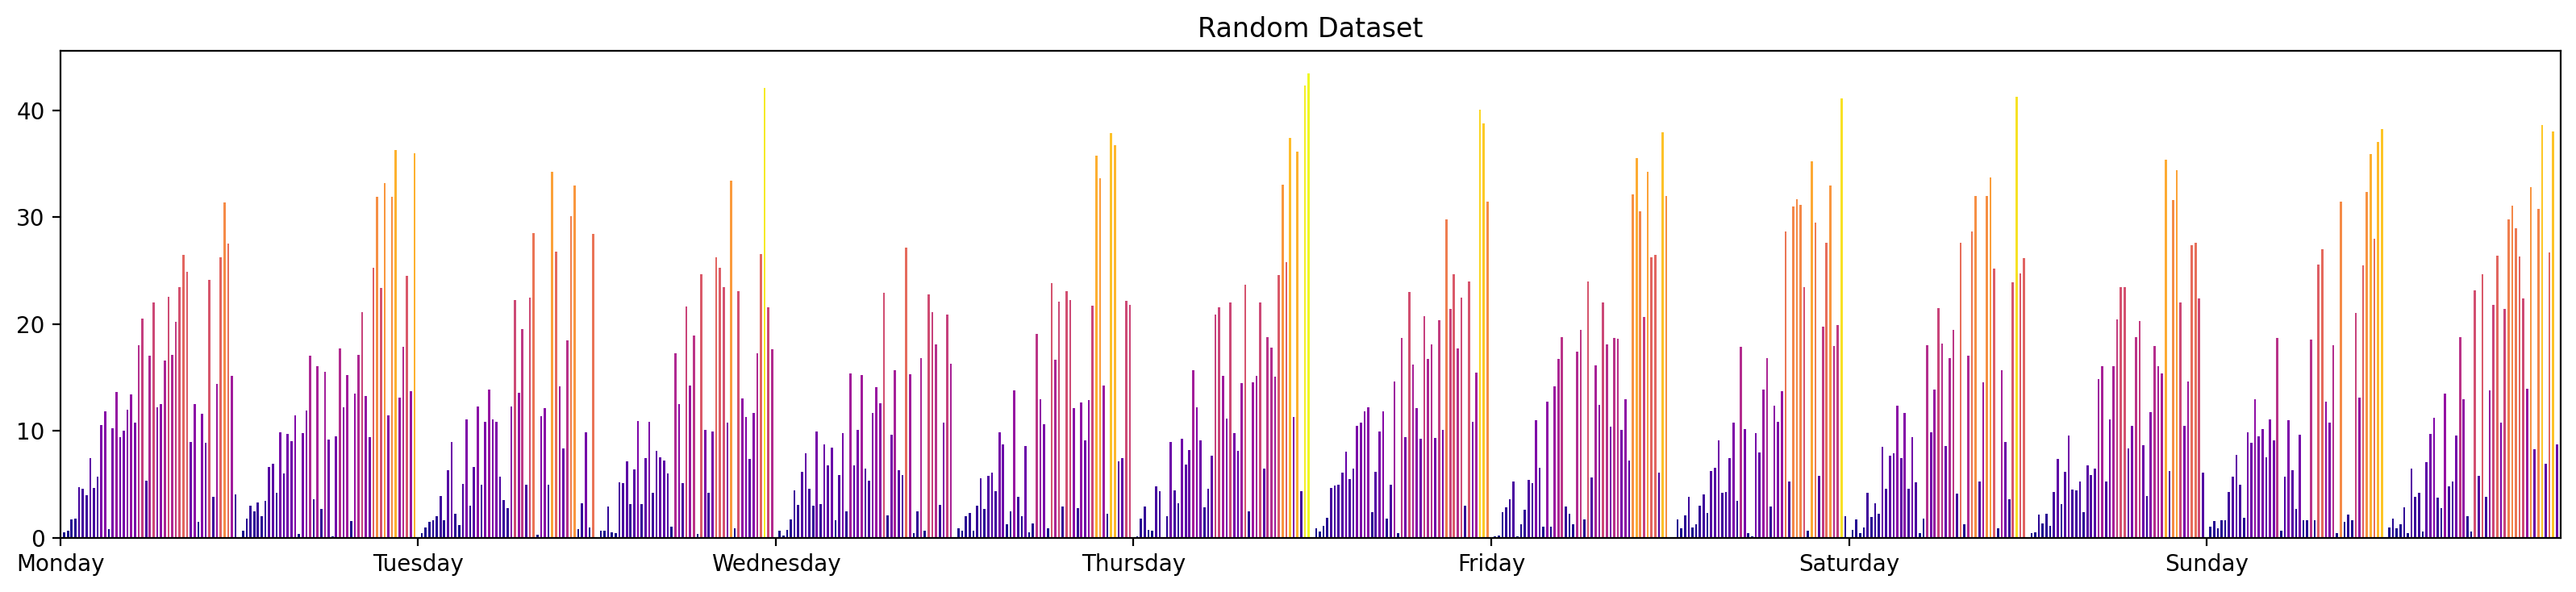

In [4]:
ax = timeseries_bar_plot(random_df, time_col='time', value_col='value', date_format="%A", dpi=200)
ax.set_title('Random Dataset');

### Energy dataset

Let's try a more interesting dataset now:

In [5]:
df = (
    pd.read_csv('https://raw.githubusercontent.com/bukhsh/gridwatch/master/gridwatch.csv')
    .rename(columns=lambda x: x.strip())
    .assign(timestamp=lambda x: pd.to_datetime(x.timestamp))
    .query('timestamp > "2016-01-4" and timestamp < "2016-01-11"')
)
df.head()

,id,timestamp,demand
864,483264,2016-01-04 00:00:06,26284
865,483265,2016-01-04 00:05:01,26140
866,483266,2016-01-04 00:10:01,26497
867,483267,2016-01-04 00:15:01,26611
868,483268,2016-01-04 00:20:03,26552


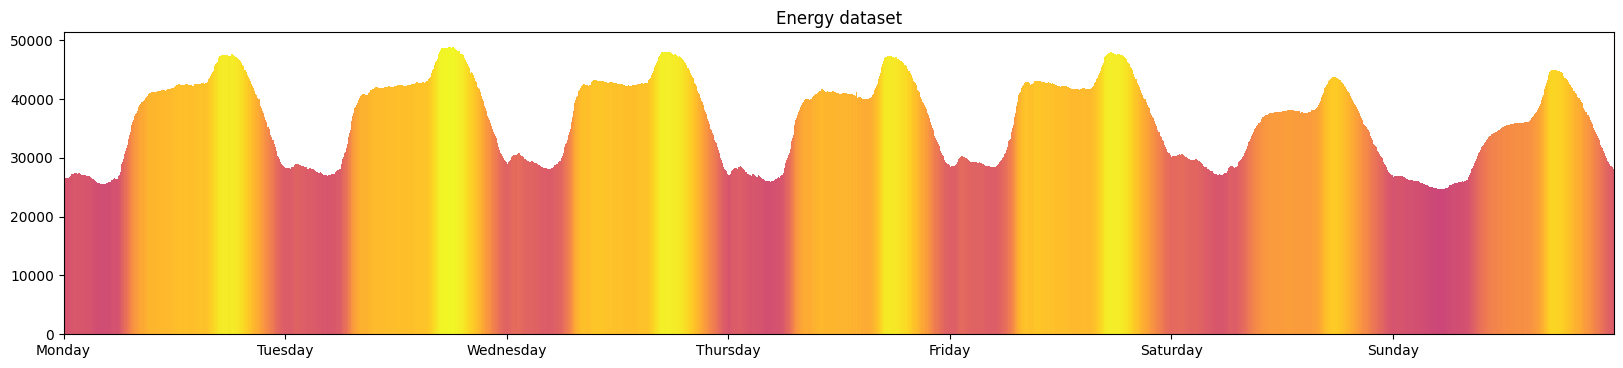

In [6]:
ax = timeseries_bar_plot(
    df, time_col='timestamp', value_col='demand', date_format="%A", timedelta_min=timedelta(seconds=10)
)
ax.set_title("Energy dataset");